In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating the main multi-column time series DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
data = np.cumsum(np.random.randn(100, 3), axis=0)
df = pd.DataFrame(data, index=dates, columns=['Series1', 'Series2', 'Series3'])

# Simulating the secondary DataFrame with named events and their corresponding scale values
event_names = ['SVB +2%', 'Covid +1%', '2008 Crisis -5%']
scale_values = np.array([2, 1, -5])
scale_df = pd.DataFrame(scale_values, index=event_names, columns=['Scale'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(df.index.min(), df.index.max() + pd.Timedelta(days=20))  # Extend the x-axis for the scale
ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

# Plot each line with fading effect
alpha_step = 0.02  # Controls the fading speed
line_objects = []  # To hold the line objects for the legend
for frame in range(10, len(df), 10):  # Taking every 10th frame for visibility
    for i, col in enumerate(df.columns):
        alpha = max(0, 1.0 - alpha_step * (len(df) - frame))
        line, = ax.plot(df.index[:frame], df[col][:frame], alpha=alpha, label=col)
        if frame == len(df) - 1:  # Add the final line objects to the list
            line_objects.append(line)

# Add the vertical scale line based on the scale_df
scale_x_pos = df.index[-1] + pd.Timedelta(days=10)  # Position of the vertical scale line
ax.axvline(x=scale_x_pos, color='black', linestyle='--')  # Vertical line indicating the scale

# Manually adding ticks and labels for the vertical scale
for i, event in enumerate(scale_df.index):
    scale_value = scale_df.loc[event, 'Scale']
    ax.plot([scale_x_pos - pd.Timedelta(days=2), scale_x_pos + pd.Timedelta(days=2)], [scale_value, scale_value], color='black')  # Adding ticks
    ax.text(scale_x_pos + pd.Timedelta(days=5), scale_value, 
            event, 
            verticalalignment='center', horizontalalignment='left', 
            fontsize=9, color='black')  # Ensuring text is in black

# Position the legend above the chart, without the box line
ax.legend(handles=line_objects, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, frameon=False)

# Customize the spines (remove the top and right spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and legend to the main plot
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Display the plot
plt.show()

In [6]:
scale_df

Scale
SVB +2%              2
Covid +1%            1
2008 Crisis -5%     -5

In [7]:
df

Series1    Series2    Series3
2023-01-01   1.764052   0.400157   0.978738
2023-01-02   4.004946   2.267715   0.001460
2023-01-03   4.955034   2.116358  -0.101759
2023-01-04   5.365632   2.260402   1.352515
2023-01-05   6.126670   2.382077   1.796378
...               ...        ...        ...
2023-04-06   9.396256   6.282026 -11.198087
2023-04-07  10.086074   7.583872 -11.826175
2023-04-08   9.605047   9.887789 -12.886190
2023-04-09   9.469097  11.024680 -12.788465
2023-04-10  10.052051  10.625231 -12.418409

[100 rows x 3 columns]

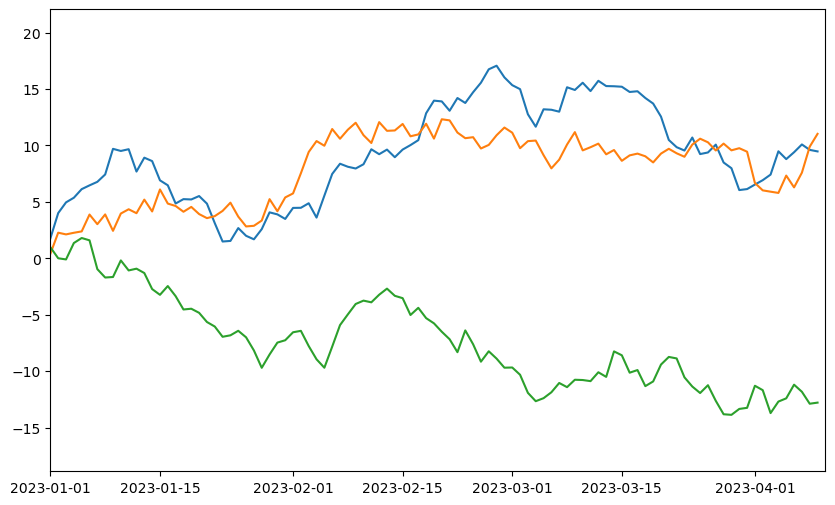

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulating the main multi-column time series DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
data = np.cumsum(np.random.randn(100, 3), axis=0)
df = pd.DataFrame(data, index=dates, columns=['Series1', 'Series2', 'Series3'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(df.index.min(), df.index.max())
ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

# Initialize the lines for each series
lines = []
for col in df.columns:
    line, = ax.plot([], [], label=col)
    lines.append(line)

# Initialize the plot
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Function to update the plot with data
def update(frame):
    for i, line in enumerate(lines):
        x = df.index[:frame]
        y = df.iloc[:frame, i]
        line.set_data(x, y)
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=200)

# Display the animation in Jupyter
HTML(ani.to_jshtml())


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulating the main multi-column time series DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=10, freq='D')  # 10 periods
strikes = np.array([4700, 77000, 5050])
data = np.cumsum(np.random.randn(10, len(strikes)), axis=0)  # 10 rows to match the dates
df = pd.DataFrame(data, index=dates, columns=strikes)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(strikes.min() - 50, strikes.max() + 50)
ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

# Initialize a list to hold all the lines
lines = []

# Initialize the plot
def init():
    return lines

# Function to update the plot with data
def update(frame):
    # Draw the new curve for the current time point
    x = strikes
    y = df.iloc[frame, :]
    line, = ax.plot(x, y, lw=2, color='blue', alpha=1.0)
    lines.append(line)
    
    # Fast fade out previous curves
    fade_factor = 0.3  # Increased for faster fading
    for i, line in enumerate(lines):
        line.set_alpha(max(0, 1.0 - fade_factor * (len(lines) - i)))

    ax.set_title(f"Date: {df.index[frame].strftime('%Y-%m-%d')}")
    
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=1000)  # Adjusted interval for 10 seconds total

# Display the animation in Jupyter and suppress additional outputs
plt.close(fig)  # This ensures that only the animation is displayed and prevents additional figures from being shown.
HTML(ani.to_jshtml())


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulating the main multi-column time series DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=1, freq='D')  # 10 periods
strikes = np.array([4700, 77000, 5050])
data = np.cumsum(np.random.randn(10, len(strikes)), axis=0)  # 10 rows to match the dates
df = pd.DataFrame(data, index=dates, columns=strikes)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(strikes.min() - 50, strikes.max() + 50)
ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

# Initialize a list to hold all the lines
lines = []

# Initialize the plot
def init():
    return lines

# Function to update the plot with data
def update(frame):
    # Clear the axis for the new frame to avoid duplication
    ax.clear()
    ax.set_xlim(strikes.min() - 50, strikes.max() + 50)
    ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

    # Plot all the previous lines with fading effect
    fade_factor = 0.2  # Control the fading speed
    for i, line in enumerate(lines):
        line.set_alpha(max(0, 1.0 - fade_factor * (len(lines) - i)))
        ax.plot(strikes, line.get_ydata(), lw=2, color='blue', alpha=line.get_alpha())

    # Plot the new line for the current frame only once
    new_line, = ax.plot(strikes, df.iloc[frame, :], lw=2, color='blue', alpha=1.0)
    lines.append(new_line)

    # Update the title with the current date
    ax.set_title(f"Date: {df.index[frame].strftime('%Y-%m-%d')}")
    
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=1000)

# Display the animation in Jupyter
plt.close(fig)  # Ensure no duplicate figures
HTML(ani.to_jshtml())


ValueError: Shape of passed values is (10, 3), indices imply (1, 3)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulating the main multi-column time series DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=10, freq='D')  # 10 periods
strikes = np.array([4700, 77000, 5050])
data = np.cumsum(np.random.randn(10, len(strikes)), axis=0)  # 10 rows to match the dates
df = pd.DataFrame(data, index=dates, columns=strikes)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(strikes.min() - 50, strikes.max() + 50)
ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

# Initialize a list to hold all the lines
lines = []

# Initialize the plot
def init():
    for strike in strikes:
        line, = ax.plot([], [], lw=2, color='blue')  # Empty data for initialization
        lines.append(line)
    return lines

# Function to update the plot with data
def update(frame):
    # Plot all the previous lines with fading effect
    fade_factor = 0.2  # Control the fading speed
    for i, line in enumerate(lines):
        if frame > i:
            line.set_data(strikes, df.iloc[frame-i-1, :])
            line.set_alpha(max(0, 1.0 - fade_factor * (frame - i)))

    # Plot the new line for the current frame
    lines[frame % len(lines)].set_data(strikes, df.iloc[frame, :])
    lines[frame % len(lines)].set_alpha(1.0)

    # Update the title with the current date
    ax.set_title(f"Date: {df.index[frame].strftime('%Y-%m-%d')}")
    
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=1000)

# Display the animation in Jupyter
plt.close(fig)  # Ensure no duplicate figures
HTML(ani.to_jshtml())


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulating the main multi-column time series DataFrame
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=10, freq='D')  # 10 periods
strikes = np.array([4700, 77000, 5050])
data = np.cumsum(np.random.randn(10, len(strikes)), axis=0)  # 10 rows to match the dates
df = pd.DataFrame(data, index=dates, columns=strikes)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(strikes.min() - 50, strikes.max() + 50)
ax.set_ylim(df.min().min() - 5, df.max().max() + 5)

# Initialize a list to hold all the lines
lines = []

# Initialize the plot
def init():
    for strike in strikes:
        line, = ax.plot([], [], lw=1, color='blue')  # Empty data for initialization
        lines.append(line)
    return lines

# Function to update the plot with data
def update(frame):
    # Plot all the previous lines with fading effect
    fade_factor = 0.2  # Control the fading speed
    for i, line in enumerate(lines):
        if frame > i:
            line.set_data(strikes, df.iloc[frame-i-2, :])
            #line.set_alpha(max(0, 1.0 - fade_factor * (frame - i)))

    # Plot the new line for the current frame
    lines[frame % len(lines)].set_data(strikes, df.iloc[frame, :])
 

    # Update the title with the current date
    ax.set_title(f"Date: {df.index[frame].strftime('%Y-%m-%d')}")
    
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=1000)

# Display the animation in Jupyter
plt.close(fig)  # Ensure no duplicate figures
HTML(ani.to_jshtml())


In [54]:
data

array([[ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01],
       [ 4.00494555e+00,  2.26771520e+00,  1.46010423e-03],
       [ 4.95503396e+00,  2.11635799e+00, -1.01758748e-01],
       [ 5.36563246e+00,  2.26040156e+00,  1.35251476e+00],
       [ 6.12667019e+00,  2.38207658e+00,  1.79637799e+00],
       [ 6.46034452e+00,  3.87615565e+00,  1.59121973e+00],
       [ 6.77341222e+00,  3.02205991e+00, -9.61770087e-01],
       [ 7.42703081e+00,  3.88649611e+00, -1.70393511e+00],
       [ 9.69678544e+00,  2.43213044e+00, -1.65817659e+00],
       [ 9.50960159e+00,  3.96490965e+00, -1.88817821e-01]])